In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ipl_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


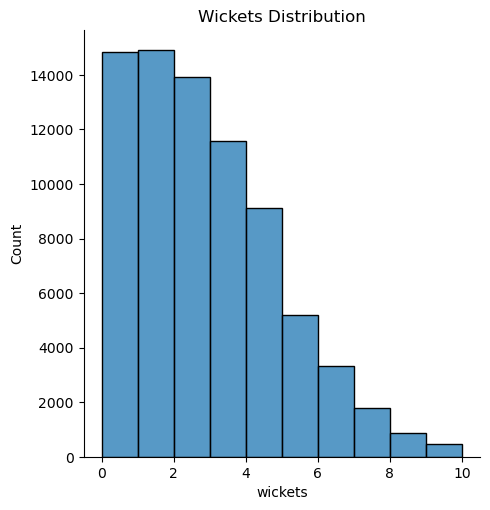

In [7]:
#Wickets Distribution
sns.displot(df['wickets'],bins=10)
plt.title("Wickets Distribution")

plt.show()

#it shows the count of runs per wicket

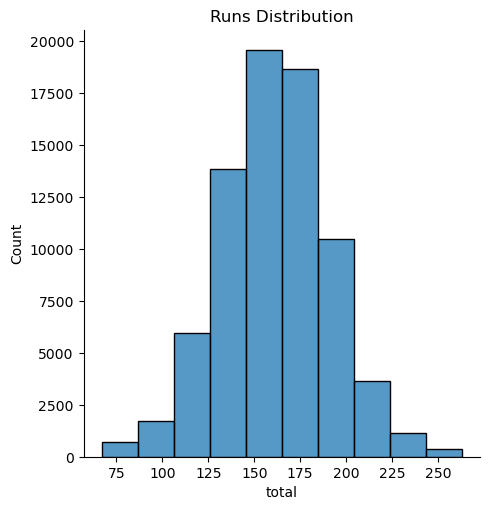

In [8]:
#Runs Distribution
sns.displot(df['total'],bins=10)
plt.title("Runs Distribution")

plt.show()

#it shows the total score made by all teams & total score made per inning by teams

In [9]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print('Before Removing Irrelevant Columns : ipl_df.shape',df.shape)
df = df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print('After Removing Irrelevant Columns :',df.shape)
df.head()   

#here we removed unnecessary columns

Before Removing Irrelevant Columns : ipl_df.shape (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df.shape

#now there's only 8 columns left which is needed

(76014, 8)

In [11]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

#taking only consisten teams for accurate predictions 

In [12]:
print('Before Removing Inconsistent Teams : ',df.shape)
df =df[(df['bat_team'].isin(const_teams)) & (df['bowl_team'].isin(const_teams))]
#here isin() method is used to check that the column is present in that array or not, 
#in our case we are checking the column 'bat_team' is present in our array 'const_team' or not 
print('After Removing Irrelevant Columns :',df.shape)
const_teams=df['bat_team'].unique()
print(f"Consistent Teams : \n")
df.head()


Before Removing Inconsistent Teams :  (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 



,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
#removing first 5 overs of every match
print('Before Removing Overs :' ,df.shape)
df = df[df['overs'] >= 5.0]
#overs should be greater than 5
print('After Removing Overs :' ,df.shape)
df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#lable encoder is used when we have ordinal data like (male,female)
#one hot encoder is used when we have unordered data like if we have name then name can be diff (mrf,ash)
#we use this to convert a catgorical var into numerical 
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
    df[col] = le.fit_transform(df[col])
df.head()

#in the output you can see the col of bat,bowl_team is converted into integer

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [15]:
from sklearn.compose import ColumnTransformer
#its used to encode catgorial variables into binary format 0 1
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')
#encoder is the instance of 'one hot Encoder ' cla;ss
#remainder means the remianing columns which is clearly not transfromed will be passed without any changes

In [16]:
df = np.array(columnTransformer.fit_transform(df))

In [17]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(df, columns=cols)
df.head()
# Encoded Data
# the output shows each & every team has its batting and bowling col
#if the team is present in the match then that col shows 1 else it'll show 0

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


In [18]:
features = df.drop(['total'], axis=1)
labels = df['total']
print("shape of feature is",features.shape)
print("shape of lable is",labels.shape)

#dropping total col cuz its our 'y' varibale and we are gonna predict it 
#feature = matrix, labels = vector
#in the otpt we can see in feature is independent var and in lable there is no independent variable


shape of feature is (40108, 21)
shape of lable is (40108,)


In [19]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20)
print("Training Set :",train_features.shape)
print("Testing Set :",test_features.shape)

#distributing 80% data for train and remaining 20% is for test

Training Set : (32086, 21)
Testing Set : (8022, 21)


In [20]:
models = dict()
#creating it cuz we're gonna do multiple types of regression ahead

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

# fitting  datd in rgression model 

DecisionTreeRegressor()

In [22]:
# Evaluate Model
train_score_tree = tree.score(train_features, train_labels) * 100
test_score_tree = tree.score(test_features, test_labels) * 100
print('Train Score : ',train_score_tree)
print('Test Score :',test_score_tree)
models["tree"] = test_score_tree

#it shows how accurate  our model is working 

Train Score :  99.99042330021646
Test Score : 84.91346327786404


In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

# fitting  datd in rgression model

LinearRegression()

In [24]:

# Evaluate Model
train_score_linreg = linreg.score(train_features, train_labels) * 100
test_score_linreg = linreg.score(test_features, test_labels) * 100
print('Train Score : ',train_score_linreg)
print('Test Score :',test_score_linreg)
models["linreg"] = test_score_linreg

#it shows how accurate  our model is working

Train Score :  65.9850500285177
Test Score : 65.6556992297045


In [25]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [26]:
# Evaluate Model
train_score_forest  = forest.score(train_features, train_labels) * 100
test_score_forest  = forest.score(test_features, test_labels) * 100
print('Train Score : ',train_score_forest)
print('Test Score :',test_score_forest )
models["forest"] = test_score_forest 

#it shows how accurate  our model is working 

Train Score :  99.05880927917661
Test Score : 93.21474731527498


Text(0, 0.5, 'Score of Regression Models')

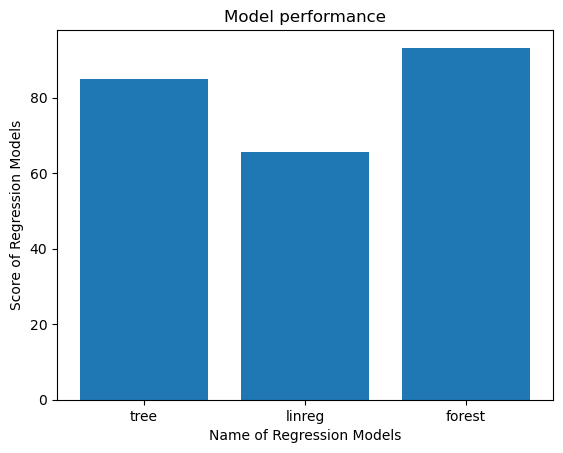

In [27]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
# model names is our x axis
#list is use to convert keys of model dick into list
accuracy = list(map(float, models.values()))
#map is used to convert the value of dictionary into list of floats cuz the values of dick stored as a string
#accuracy is our y axis
# creating the bar plot
plt.bar(model_names, accuracy)
plt.title("Model performance")
plt.xlabel ("Name of Regression Models") 
plt.ylabel ("Score of Regression Models") 

In [28]:
#we can clearly see from the graph that random forest model is good for prediction model so we will use it.


def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
    prediction_array = []
    #prediction array is a list
  # Batting Team
    if batting_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
    #if the team is present in the match then that col shows 1 else it'll show 0
    #each value in the array represents a specific team
  # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
    prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
    # it includes additional values in the array for pred 
    prediction_array = np.array([prediction_array])
    #created updated numpy array
    pred = model.predict(prediction_array)
    #predicting the model
    return int(round(pred[0]))
# we use index 0 to access first element of prediction array

In [34]:
batting_team='Royal Challengers Bangalore'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=14.0, runs=131, wickets=5, runs_last_5=51, wickets_last_5=1)
print("Predicted Score :", {score})

Predicted Score : {175}


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))
#picle dump is used to serialize the model of obj and save it to new file
#forest is our model
#wb is used to open a file in binary code